<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

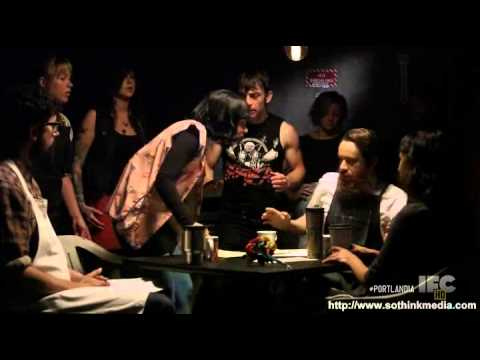

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'C:\\Users\\xpand\\Documents\\GitHub\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [58]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [59]:
# Start here 
date = []
for i in range(len(shops['full_review_text'])):
    string = shops['full_review_text'][i].strip(' ')
    partition = string.partition(' ')
    date.append(partition[0])
    shops['full_review_text'][i] = string.strip(partition[0]).strip(' ').strip('1 check-in').strip('2 check-ins').strip('3 check-ins')
date[:5]

['11/25/2016', '12/2/2016', '11/30/2016', '11/25/2016', '12/3/2016']

In [60]:
shops['date'] = date

In [61]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,date
0,The Factory - Cafe With a Soul,Love love loved the atmosphere! Every corner o...,5.0 star rating,11/25/2016
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4.0 star rating,12/2/2016
2,The Factory - Cafe With a Soul,Listed in Brunch Spots I loved the eclectic an...,4.0 star rating,11/30/2016
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating How...,2.0 star rating,11/25/2016
4,The Factory - Cafe With a Soul,They are located within the Northcross mall sh...,4.0 star rating,12/3/2016


In [62]:
shops['full_review_text'][0]

'Love love loved the atmosphere! Every corner of the coffee shop had its own style, and there were swings!!! I ordered the matcha latte, and it was muy fantastico! Ordering and getting my drink were pretty streamlined. I ordered on an iPad, which included all beverage selections that ranged from coffee to wine, desired level of sweetness, and a checkout system. I got my latte within minutes!  I was hoping for a typical heart or feather on my latte, but found myself listing out all the possibilities of what the art may be. Any ideas?'

In [63]:
shops['star_rating'][0]

' 5.0 star rating '

In [64]:
for i in range(len(shops['star_rating'])):
    string = shops['star_rating'][i].strip(' ').strip('.0 star rating ')
    shops['star_rating'][i] = string
shops['star_rating'][:5]

0    5
1    4
2    4
3    2
4    4
Name: star_rating, dtype: object

In [65]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,date
0,The Factory - Cafe With a Soul,Love love loved the atmosphere! Every corner o...,5,11/25/2016
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4,12/2/2016
2,The Factory - Cafe With a Soul,Listed in Brunch Spots I loved the eclectic an...,4,11/30/2016
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating How...,2,11/25/2016
4,The Factory - Cafe With a Soul,They are located within the Northcross mall sh...,4,12/3/2016


In [66]:
import spacy

sent = shops['full_review_text'][0]

nlp = spacy.load("en_core_web_lg")

doc = nlp(sent)

# Lemma Attributes
for token in doc:
    print(token.text, "  ", token.lemma_)

Love    love
love    love
loved    love
the    the
atmosphere    atmosphere
!    !
Every    every
corner    corner
of    of
the    the
coffee    coffee
shop    shop
had    have
its    -PRON-
own    own
style    style
,    ,
and    and
there    there
were    be
swings    swing
!    !
!    !
!    !
I    -PRON-
ordered    order
the    the
matcha    matcha
latte    latte
,    ,
and    and
it    -PRON-
was    be
muy    muy
fantastico    fantastico
!    !
Ordering    order
and    and
getting    get
my    -PRON-
drink    drink
were    be
pretty    pretty
streamlined    streamlined
.    .
I    -PRON-
ordered    order
on    on
an    an
iPad    iPad
,    ,
which    which
included    include
all    all
beverage    beverage
selections    selection
that    that
ranged    range
from    from
coffee    coffee
to    to
wine    wine
,    ,
desired    desire
level    level
of    of
sweetness    sweetness
,    ,
and    and
a    a
checkout    checkout
system    system
.    .
I    -PRON-
got    get
my    -P

In [97]:
# Wrap it all in a function
def get_lemmas(text):
    
    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc:
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_.strip())
    
    return lemmas

In [98]:
shops['lemmas'] = shops['full_review_text'].apply(get_lemmas)

In [99]:
shops['lemmas'].head()

0    [love, love, love, atmosphere, corner, coffee,...
1    [list, Date, Night, Austin, Ambiance, Austin, ...
2    [list, Brunch, Spots, love, eclectic, homey, p...
3    [cool, decor, good, drink, nice, seating, , , ...
4    [locate, Northcross, mall, shopping, center, f...
Name: lemmas, dtype: object

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [103]:
from collections import Counter

def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [108]:
one_star = shops[shops['star_rating'] == '1']
two_star = shops[shops['star_rating'] == '2']
three_star = shops[shops['star_rating'] == '3']
badshops = pd.concat([one_star, two_star, three_star])
badwc = count(badshops['lemmas'])
four_star = shops[shops['star_rating'] == '4']
five_star = shops[shops['star_rating'] == '5']
goodshops = pd.concat([four_star, five_star])
goodwc = count(goodshops['lemmas'])
goodwc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
0,,3437,12264,1.0,0.042267,0.042267,0.559772
61,coffee,3911,8015,2.0,0.027623,0.069890,0.636971
69,place,3122,4798,3.0,0.016536,0.086426,0.508469
170,good,2929,4345,4.0,0.014975,0.101401,0.477036
87,great,2500,3460,5.0,0.011925,0.113325,0.407166


In [114]:
diff_count = []
for i in range(len(goodwc.index)):
    for j in range(len(badwc.index)):
        goodword = goodwc['word'][i]
        goodcount = goodwc['count'][i]
        badword = badwc['word'][j]
        badcount = badwc['count'][j]
        if goodword == badword:
            if goodcount >= badcount:
                diff_count.append(goodcount - badcount)
            else:
                diff_count.append(badcount - goodcount)
diff_count

[8693,
 24,
 96,
 197,
 641,
 239,
 33,
 204,
 172,
 18,
 52,
 1075,
 15,
 26,
 226,
 855,
 181,
 1855,
 588,
 9,
 104,
 464,
 1695,
 836,
 18,
 18,
 30,
 150,
 172,
 382,
 16,
 59,
 866,
 310,
 24,
 164,
 740,
 38,
 461,
 57,
 7,
 100,
 127,
 8,
 244,
 231,
 92,
 99,
 38,
 84,
 97,
 5906,
 10,
 38,
 142,
 438,
 103,
 413,
 9,
 3572,
 194,
 139,
 31,
 1281,
 241,
 85,
 29,
 712,
 10,
 527,
 633,
 276,
 24,
 121,
 1121,
 45,
 502,
 2997,
 277,
 420,
 376,
 149,
 246,
 19,
 356,
 249,
 7,
 99,
 63,
 39,
 6,
 101,
 54,
 37,
 83,
 792,
 158,
 646,
 46,
 32,
 36,
 202,
 82,
 39,
 32,
 1306,
 412,
 221,
 1,
 789,
 30,
 34,
 193,
 15,
 25,
 232,
 23,
 105,
 36,
 142,
 611,
 372,
 125,
 45,
 158,
 78,
 17,
 41,
 13,
 33,
 3,
 422,
 336,
 667,
 44,
 475,
 47,
 316,
 642,
 144,
 85,
 487,
 39,
 65,
 117,
 58,
 49,
 480,
 95,
 332,
 447,
 561,
 3344,
 658,
 35,
 8,
 1039,
 17,
 19,
 486,
 288,
 77,
 1013,
 98,
 711,
 68,
 17,
 227,
 1488,
 165,
 35,
 94,
 17,
 154,
 63,
 136,
 137,
 210,
 36,
 14

In [125]:
df = pd.DataFrame(goodwc['word'])
diff= pd.DataFrame(diff_count, columns = ['count'])
diff_df = pd.concat([df, diff], axis = 1)
diff_df

,word,count
0,,8693.0
1,rave,24.0
2,decent,96.0
3,unique,197.0
4,pretty,641.0
...,...,...
14896,lentil,NaN
14897,mum,NaN
14898,foodwise,NaN
14899,foodgasm,NaN


In [132]:
total = diff_df['count'].sum()
diff_df['pct_total'] = diff_df['count'].apply(lambda x: x / total)
diff_df

,word,count,pct_total
0,,8693.0,0.044443
1,rave,24.0,0.000123
2,decent,96.0,0.000491
3,unique,197.0,0.001007
4,pretty,641.0,0.003277
...,...,...,...
14896,lentil,NaN,NaN
14897,mum,NaN,NaN
14898,foodwise,NaN,NaN
14899,foodgasm,NaN,NaN


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [133]:
diff_df_top10 = diff_df.sort_values(by = 'count', ascending = False)[1:11]
diff_df_top10

,word,count,pct_total
51,seat,5906.0,0.030194
59,weather,3572.0,0.018262
152,Matcha,3344.0,0.017096
77,parking,2997.0,0.015322
17,probably,1855.0,0.009484
22,Night,1695.0,0.008666
168,cute,1488.0,0.007607
303,recommend,1340.0,0.006851
361,plan,1334.0,0.006820
105,flavor,1306.0,0.006677


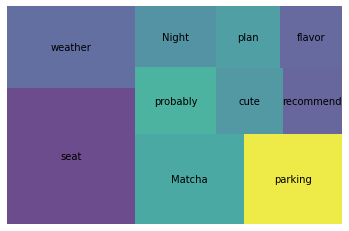

In [134]:
squarify.plot(sizes=diff_df_top10['pct_total'], label=diff_df_top10['word'], alpha=.8)
plt.axis('off')
plt.show()

Given by the prior visualization, what makes or breaks a good coffee shop are the following: the seating available, the weather in that particular area, whether the shop had Matcha, the parking, the night life of the shop, whether it was cute or not, whether it was recommended, and lastly the flavor of the drinks.

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

